# Expedia Analytics Assignment

### Definitions

**Week**	
The year and week that the booking took place. 2016-W45 is the week beginning 07/11/2016

**Platform**  
Type of device used to make the booking - Desktop computer, Mobile App (on a Smartphone or Tablet device), or our Mobile website (on a Smartphone or Tablet device)

**Super Region**	
The region that the traveler originates from (North America, Asia-Pacific, Europe Middle East & Africa or Latin America)

**Country Name**	
The country that the traveler originates from

**Booking Window Group**	
Refers to the number of days between the customer booking and checking into the hotel. E.g. if a customer booked a trip on January 1st and checked in on January 10th, the booking window would be 9 days

**Property Country**	
The country in which the booked hotel is located

**Net Gross Booking Value USD**	
The total $ amount that customers pay to Hotels.com for their hotel reservation. The value of cancelled bookings is removed

**Net Orders**  
The total number of hotel bookings made - the number of bookings cancelled


### IDEAS

Group by month to see increased usage of mobile app?
more cancellations on mobile app because brief usage
wheres most profitable

In [ ]:
#import modules
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [16]:
# Load dataset from xlsx file, 'Data' sheet only
dataset = pd.read_excel (r'/Users/jacobmarlow/Desktop/Assignment_Analytics_Graduate.xlsx',
                    sheet_name='Data') 

# Take a look
dataset.head()

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,-608.4244,-3
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,-512.1796,-2
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,103.4298,1
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,395.9592,1
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,373.4194,1


In [8]:
# What signals/data available
list(dataset)

['Week',
 'Mobile Indicator Name',
 'Platform Type Name',
 'Super Region',
 'Country Name',
 'Booking Window Group',
 'Property Country',
 'Net Gross Booking Value USD',
 'Net Orders']

In [87]:
dataset.describe(percentiles=None, include=None, exclude=None)

,Net Gross Booking Value USD,Net Orders
count,7.368800e+04,73688.000000
mean,1.274363e+04,47.954606
std,2.072294e+05,991.128900
min,-9.689693e+04,-50.000000
25%,2.158794e+02,1.000000
50%,8.575607e+02,2.000000
75%,3.198414e+03,8.000000
max,1.166149e+07,63230.000000


In [30]:
platform_split = dataset.groupby('Mobile Indicator Name').size()

In [32]:
platform_split.values.sum()

73688

In [85]:
# Total Net Gross Booking Value
dataset['Net Gross Booking Value USD'].sum()

939052525.9852998

In [84]:
# by platform
dataset.groupby('Mobile Indicator Name')['Net Gross Booking Value USD'].sum()

Mobile Indicator Name
Desktop    6.693461e+08
Mobile     2.697064e+08
Name: Net Gross Booking Value USD, dtype: float64

<BarContainer object of 2 artists>

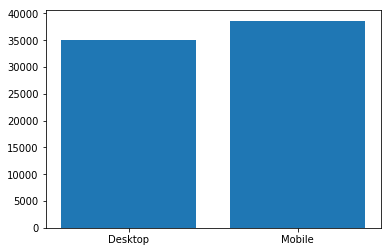

In [31]:
plt.bar(platform_split.index.values, platform_split.values, width=0.8)

In [34]:
# Type of device used to make the booking - Desktop computer, 
# Mobile App (on a Smartphone or Tablet device), or our Mobile website 
# (on a Smartphone or Tablet device)
Platform_Type_Name_Count = dataset.groupby('Platform Type Name').size()
print(Platform_Type_Name_Count)

Platform Type Name
Desktop       35048
Mobile App    18788
Mobile Web    19852
dtype: int64


In [35]:
Platform_Type_Name_Count.values.sum()

73688

In [37]:
# The region that the traveler originates from 
# (North America, Asia-Pacific, Europe Middle East & Africa or Latin America)
# APAC = Asia-Pacific
# EMEA = Europe
# LATAM = Latin America

Super_Region_Count = dataset.groupby('Super Region').size()
print(Super_Region_Count)
Super_Region_Count.values.sum()

Super Region
APAC     23805
EMEA     23477
LATAM     6141
dtype: int64


53423

In [54]:
# See miscount after review (total lines = 73688)
# After reviewing data NA picked up as NA
dataset['Super Region'] = dataset['Super Region'].replace(to_replace=float('nan'), value='NA', method='pad')


In [55]:
# Try again 
Super_Region_Count = dataset.groupby('Super Region').size()
print(Super_Region_Count)
Super_Region_Count.values.sum()

Super Region
APAC     23805
EMEA     23477
LATAM     6141
NA       20265
dtype: int64


73688

<BarContainer object of 7 artists>

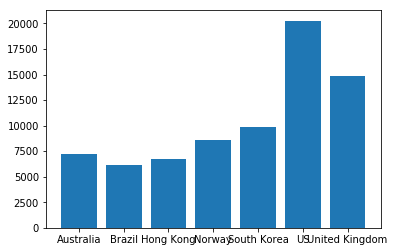

In [39]:
# The country that the traveler originates from
Country_Name_Count = dataset.groupby('Country Name').size()

plt.bar(Country_Name_Count.index.values, Country_Name_Count.values)

In [13]:
# Refers to the number of days between the customer booking and checking 
# into the hotel. E.g. if a customer booked a trip on January 1st and 
# checked in on January 10th, the booking window would be 9 days
dataset.groupby('Booking Window Group').size()

Booking Window Group
+90 days      8529
0-1 days      9331
15-30 days    9080
2-3 days      8018
31-45 days    8084
4-7 days      8175
46-60 days    7131
61-90 days    7057
8-14 days     8243
Post Book       40
dtype: int64

In [41]:
# The country in which the booked hotel is located
Property_Country_Count = dataset.groupby('Property Country').size()
print(Property_Country_Count)

Property Country
Albania                               55
Algeria                               87
American Samoa                        15
Andorra                               97
Angola                                31
Anguilla                              42
Antigua and Barbuda                  188
Argentina                            807
Armenia                               48
Aruba                                271
Australia                           1332
Austria                             1026
Azerbaijan                            88
Bahamas                              310
Bahrain                              218
Bangladesh                           121
Barbados                             292
Belarus                               37
Belgium                              976
Belize                               200
Benin                                 15
Bermuda                              118
Bhutan                                 2
Bolivia                              291

In [43]:
Property_Country_Count.values.sum()

73688

In [17]:
# The total $ amount that customers pay to Hotels.com for their hotel 
# reservation. The value of cancelled bookings is removed
dataset.groupby('Net Gross Booking Value USD').size()

Net Gross Booking Value USD
-9.689693e+04    1
-6.678927e+04    1
-6.160039e+04    1
-6.054669e+04    1
-4.905519e+04    1
-3.754777e+04    1
-3.669678e+04    1
-3.254291e+04    1
-3.240011e+04    1
-3.236872e+04    1
-3.110241e+04    1
-2.889829e+04    1
-2.795755e+04    1
-2.704896e+04    1
-2.551476e+04    1
-2.521676e+04    1
-2.297342e+04    1
-2.290353e+04    1
-2.170750e+04    1
-2.152493e+04    1
-2.093247e+04    1
-2.071174e+04    1
-1.934455e+04    1
-1.930686e+04    1
-1.907291e+04    1
-1.839021e+04    1
-1.826566e+04    1
-1.818183e+04    1
-1.809648e+04    1
-1.745820e+04    1
                ..
 6.533993e+06    1
 6.534758e+06    1
 6.577019e+06    1
 6.638984e+06    1
 6.695938e+06    1
 6.723520e+06    1
 6.796831e+06    1
 6.962586e+06    1
 6.976607e+06    1
 7.110764e+06    1
 7.226565e+06    1
 7.282330e+06    1
 7.391648e+06    1
 7.670863e+06    1
 7.771650e+06    1
 7.955933e+06    1
 7.995718e+06    1
 8.031105e+06    1
 8.332554e+06    1
 8.454608e+06    1
 8.

In [14]:
# The total number of hotel bookings made - the number of bookings cancelled
dataset.groupby('Net Orders').size()

Net Orders
-50           1
-31           1
-25           1
-21           1
-18           1
-17           2
-15           1
-14           2
-13           3
-12           4
-11           5
-10           8
-8            7
-7           17
-6           17
-5           31
-4           65
-3          149
-2          495
-1         2594
 0         4073
 1        20251
 2         9401
 3         5794
 4         4057
 5         2945
 6         2233
 7         1825
 8         1538
 9         1272
          ...  
 28036        1
 28345        1
 28400        1
 29233        1
 29534        1
 29963        1
 30293        1
 30554        1
 30940        1
 30968        1
 31244        1
 31914        1
 32182        1
 32906        1
 33555        1
 33790        1
 34649        1
 35077        1
 44489        1
 46160        1
 46730        1
 50949        1
 51428        1
 51611        1
 57201        1
 59226        1
 61181        1
 61232        1
 62494        1
 63230        1
Length: 855, 

In [81]:
import datetime
d = "2016-W45"
r = datetime.datetime.strptime(d + '-D1', "%Y-W%W-D%w")
print(r)

2016-11-07 00:00:00


In [88]:
dataset['Week'][1]


'2016-W45'

In [106]:
datetime_list = []
for row, info in dataset.iterrows():
    datetime_list.append(datetime.datetime.strptime(dataset['Week'][row] + '-D1', "%Y-W%W-D%w"))
    
    
    
print(datetime_list)
    

[datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.datetime(2016, 11, 7, 0, 0), datetime.da

In [107]:
dataset['datetime'] = datetime_list

In [108]:
dataset.head()


,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders,datetime
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,-608.4244,-3,2016-11-07
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,-512.1796,-2,2016-11-07
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,103.4298,1,2016-11-07
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,395.9592,1,2016-11-07
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,373.4194,1,2016-11-07


In [121]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [124]:
import plotly

ModuleNotFoundError: No module named 'plotly'

In [116]:
pip install --upgrade pip


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [117]:
python --version

NameError: name 'python' is not defined